In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
df_train=pd.read_csv('finance_data_cleaned.csv')
df_test=pd.read_csv('finance_data_test_cleaned.csv')

In [11]:
pd.set_option('display.max_columns', None)

### Standardazing column names

In [12]:
df_train

facts.dei.EntityCommonStockSharesOutstanding.units.shares  \
0                                         1.582195e+10           
1                                         7.443804e+09           
2                                                  NaN           
3                                         1.024726e+10           
4                                         2.470000e+09           
..                                                 ...           
570                                       1.499252e+08           
571                                       1.776179e+08           
572                                       5.652335e+07           
573                                                NaN           
574                                                NaN           

     facts.dei.EntityPublicFloat.units.USD  \
0                             2.830067e+12   
1                             2.500000e+12   
2                             1.256100e+12   
3                             9.447441e+11   
4                             4.343700e+11   
..                                     ...   
570                           1.000000e+09   
571                           9.060000e+08   
572                           9.248986e+08   
573                           1.650000e+10   
574                           6.875716e+09   

     facts.us-gaap.AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment.units.USD  \
0                                         6.804400e+10                                                  
1                                         6.345900e+10                                                  
2                                         5.904200e+10                                                  
3                                         4.697500e+10                                                  
4                                         2.694000e+09                                                  
..                                                 ...                                                  
570                                                NaN                                                  
571                                       1.421600e+07                                                  
572                                       2.841491e+09                                                  
573                                       3.850000e+08                                                  
574                                       1.590000e+08                                                  

     facts.us-gaap.AccumulatedOtherComprehensiveIncomeLossNetOfTax.units.USD  \
0                                        -1.291200e+10                         
1                                        -6.457000e+09                         
2                                        -7.603000e+09                         
3                                        -4.487000e+09                         
4                                        -4.300000e+07                         
..                                                 ...                         
570                                      -1.683900e+07                         
571                                      -2.787000e+06                         
572                                      -1.543700e+07                         
573                                       9.000000e+06                         
574                                      -1.500000e+07                         

     facts.us-gaap.AmortizationOfIntangibleAssets.units.USD  \
0                                         1.200000e+09        
1                                         6.320000e+08        
2                                                  NaN        
3                                         6.040000e+08        
4                                         6.990000e+08        
..                                                 ...     

In [13]:
import re

# Define a regular expression to match the column name string
name_re = re.compile(r'[A-Z][^\.]*')

# Apply the renaming logic to all the column names
new_col_names = {}
for col in df_train.columns:
    match = name_re.search(col)
    if match:
        name = match.group()
        new_col_names[col] = name

df_train.rename(columns=new_col_names, inplace=True)


In [14]:
df_train.head()

EntityCommonStockSharesOutstanding  EntityPublicFloat  \
0                        1.582195e+10       2.830067e+12   
1                        7.443804e+09       2.500000e+12   
2                                 NaN       1.256100e+12   
3                        1.024726e+10       9.447441e+11   
4                        2.470000e+09       4.343700e+11   

   AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment  \
0                                       6.804400e+10                          
1                                       6.345900e+10                          
2                                       5.904200e+10                          
3                                       4.697500e+10                          
4                                       2.694000e+09                          

   AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
0                                    -1.291200e+10   
1                                    -6.457000e+09   
2                                    -7.603000e+09   
3                                    -4.487000e+09   
4                                    -4.300000e+07   

   AmortizationOfIntangibleAssets  \
0                    1.200000e+09   
1                    6.320000e+08   
2                             NaN   
3                    6.040000e+08   
4                    6.990000e+08   

   AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount  \
0                                         15500000.0                       
1                                          1000000.0                       
2                                                NaN                       
3                                         17000000.0                       
4                                         40000000.0                       

         Assets  AssetsCurrent  CashAndCashEquivalentsAtCarryingValue  \
0  3.467470e+11   1.287770e+11                           2.053500e+10   
1  3.645520e+11   1.578230e+11                           1.564600e+10   
2  3.652640e+11   1.647950e+11                           2.187900e+10   
3  4.626750e+11   1.467910e+11                           5.388800e+10   
4  4.118200e+10   2.307300e+10                           3.389000e+09   

   CashAndCashEquivalentsPeriodIncreaseDecrease  \
0                                  1.885800e+10   
1                                 -5.900000e+08   
2                                  2.447000e+09   
3                                  1.188000e+09   
4                                 -3.220000e+09   

   CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents  \
0                                       2.197400e+10               
1                                       1.564600e+10               
2                                       2.187900e+10               
3                                       5.425300e+10               
4                                       3.389000e+09               

   CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalentsPeriodIncreaseDecreaseIncludingExchangeRateEffect  \
0                                      -3.003000e+09                                                                
1                                      -7.238000e+09                                                                
2                                       9.340000e+08                                                                
3                                       1.777600e+10                                                                
4                                       1.399000e+09                                                                

   CommonStockParOrStatedValuePerShare  CommonStockSharesAuthorized  \
0                              0.00001                 5.040000e+10   
1                                  NaN                 2.400000e+10   
2                              0.00100                 3.000000e+11   
3                   

In [15]:
threshold = 0.05 
missing_perc = df_train.isna().mean() 
cols_to_keep = missing_perc[missing_perc < threshold].index  
finance_data_cleaned = df_train[cols_to_keep] 

In [16]:
finance_data_cleaned.head(5)

EntityCommonStockSharesOutstanding  EntityPublicFloat  \
0                        1.582195e+10       2.830067e+12   
1                        7.443804e+09       2.500000e+12   
2                                 NaN       1.256100e+12   
3                        1.024726e+10       9.447441e+11   
4                        2.470000e+09       4.343700e+11   

   AccumulatedOtherComprehensiveIncomeLossNetOfTax        Assets  \
0                                    -1.291200e+10  3.467470e+11   
1                                    -6.457000e+09  3.645520e+11   
2                                    -7.603000e+09  3.652640e+11   
3                                    -4.487000e+09  4.626750e+11   
4                                    -4.300000e+07  4.118200e+10   

   CashAndCashEquivalentsAtCarryingValue  \
0                           2.053500e+10   
1                           1.564600e+10   
2                           2.187900e+10   
3                           5.388800e+10   
4                           3.389000e+09   

   CashAndCashEquivalentsPeriodIncreaseDecrease  \
0                                  1.885800e+10   
1                                 -5.900000e+08   
2                                  2.447000e+09   
3                                  1.188000e+09   
4                                 -3.220000e+09   

   CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents  \
0                                       2.197400e+10               
1                                       1.564600e+10               
2                                       2.187900e+10               
3                                       5.425300e+10               
4                                       3.389000e+09               

   ComprehensiveIncomeNetOfTax  EarningsPerShareBasic  \
0                 2.819500e+10                   1.89   
1                 1.731100e+10                   2.20   
2                 5.399200e+10                   4.59   
3                -5.833000e+09                  -0.27   
4                 4.336000e+09                   1.76   

   EarningsPerShareDiluted  IncomeTaxExpenseBenefit  \
0                     1.88             5.625000e+09   
1                     2.20             3.914000e+09   
2                     4.56             1.135600e+10   
3                    -0.27            -3.217000e+09   
4                     1.74            -1.870000e+08   

   LesseeOperatingLeaseLiabilityPaymentsDue  LiabilitiesAndStockholdersEquity  \
0                              1.278200e+10                      3.467470e+11   
1                              1.594300e+10                      3.645520e+11   
2                              1.744000e+10                      3.652640e+11   
3                              8.127300e+10                      4.626750e+11   
4                              1.231000e+09                      4.118200e+10   

   NetCashProvidedByUsedInFinancingActivities  \
0                               -3.556300e+10   
1                               -1.134900e+10   
2                               -6.975700e+10   
3                                9.718000e+09   
4                               -1.161700e+10   

   NetCashProvidedByUsedInInvestingActivities  \
0                               -1.445000e+09   
1                               -7.150000e+09   
2                               -2.029800e+10   
3                               -3.760100e+10   
4                                7.375000e+09   

   NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
0                                3.400500e+10   2.999800e+10   
1                                1.117300e+10   1.642500e+10   
2                                9.149500e+10   5.997200e+10   
3                                4.675200e+10  -2.722000e+09   
4                                5.641000e+09   4.368000e+09   

   OperatingLeaseLiability  OperatingLeaseRightOfUseAsset  \
0             1.147000e+10                   1.041700e+

In [17]:
finance_data_cleaned.isna().sum()

EntityCommonStockSharesOutstanding                               23
EntityPublicFloat                                                 2
AccumulatedOtherComprehensiveIncomeLossNetOfTax                   7
Assets                                                            0
CashAndCashEquivalentsAtCarryingValue                            16
CashAndCashEquivalentsPeriodIncreaseDecrease                      9
CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents    23
ComprehensiveIncomeNetOfTax                                      13
EarningsPerShareBasic                                             5
EarningsPerShareDiluted                                           3
IncomeTaxExpenseBenefit                                           6
LesseeOperatingLeaseLiabilityPaymentsDue                         23
LiabilitiesAndStockholdersEquity                                  0
NetCashProvidedByUsedInFinancingActivities                        0
NetCashProvidedByUsedInInvestingActivities      

EntityCommonStockSharesOutstanding  \
EntityCommonStockSharesOutstanding                                            1.000000   
EntityPublicFloat                                                            -0.016809   
AccumulatedOtherComprehensiveIncomeLossNetOfTax                              -0.381324   
Assets                                                                        0.399928   
CashAndCashEquivalentsAtCarryingValue                                         0.333376   
CashAndCashEquivalentsPeriodIncreaseDecrease                                  0.096485   
CashCashEquivalentsRestrictedCashAndRestrictedC...                            0.263600   
ComprehensiveIncomeNetOfTax                                                   0.370074   
EarningsPerShareBasic                                                         0.012923   
EarningsPerShareDiluted                                                       0.012925   
IncomeTaxExpenseBenefit                                                       0.383275   
LesseeOperatingLeaseLiabilityPaymentsDue                                      0.470523   
LiabilitiesAndStockholdersEquity                                              0.399867   
NetCashProvidedByUsedInFinancingActivities                                   -0.267675   
NetCashProvidedByUsedInInvestingActivities                                   -0.272217   
NetCashProvidedByUsedInOperatingActivities                                    0.503689   
NetIncomeLoss                                                                 0.513528   
OperatingLeaseLiability                                                       0.529197   
OperatingLeaseRightOfUseAsset                                                 0.530603   
RetainedEarningsAccumulatedDeficit                                            0.418957   
StockholdersEquity                                                            0.601414   
WeightedAverageNumberOfDilutedSharesOutstanding                               0.994278   
WeightedAverageNumberOfSharesOutstandingBasic                                 0.994328   
cik                                                                          -0.110041   
median_worker_pay                                                             0.052095   
salary                                                                        0.526592   
environment score                                                            -0.038416   
social score                                                                  0.120066   
governance score                                                              0.118534   
esg score                                                                     0.054798   
Controversey Score                                                            0.321323   

                                                    EntityPublicFloat  \
EntityCommonStockSharesOutstanding                          -0.016809   
EntityPublicFloat                                            1.000000   
AccumulatedOtherComprehensiveIncomeLossNetOfTax              0.010065   
Assets                                                       0.018482   
CashAndCashEquivalentsAtCarryingValue                       -0.007046   
CashAndCashEquivalentsPeriodIncreaseDecrease                 0.000779   
CashCashEquivalentsRestrictedCashAndRestrictedC...          -0.007383   
ComprehensiveIncomeNetOfTax                                 -0.002258   
EarningsPerShareBasic                                       -0.001990   
EarningsPerShareDiluted                                     -0.001988   
IncomeTaxExpenseBenefit                                     -0.000288   
LesseeOperatingLeaseLiabilityPaymentsDue                    -0.009101   
LiabilitiesAndStockholdersEquity                             0.018490   
NetCashProvidedByUsedInFinancingActivities                  -0.067119   
NetCashProvidedByUsedInInvestingActivities                   0.088409   
Net

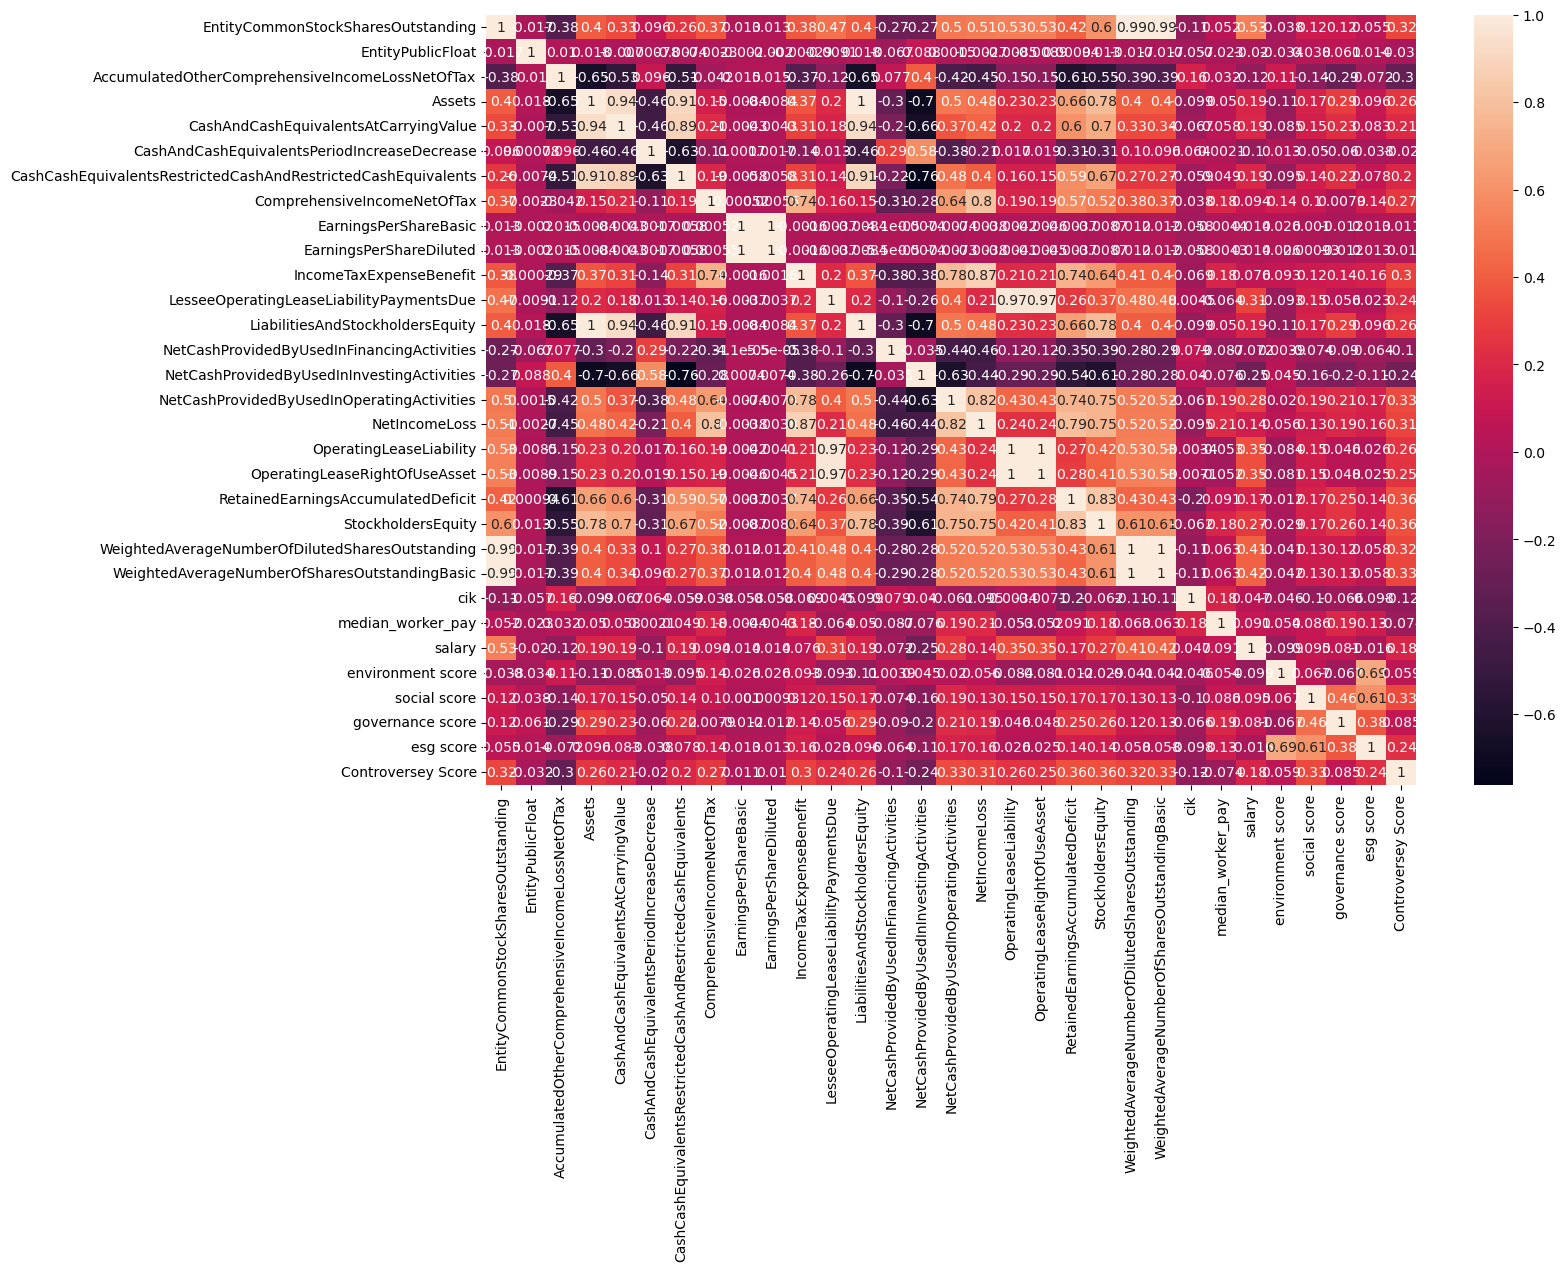

In [18]:
### Checking correlations to eliminate some features based on multicoliniarity
import seaborn as sns
import matplotlib.pyplot as plt

correlations_matrix_num = finance_data_cleaned.corr()
display(correlations_matrix_num)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

sns.heatmap(correlations_matrix_num, annot=True)
plt.show()

In [19]:
finance_data_cleaned[finance_data_cleaned['Controversey Score'].isna()]

EntityCommonStockSharesOutstanding  EntityPublicFloat  \
263                         371196508.0       1.630000e+10   
572                          56523354.0       9.248986e+08   

     AccumulatedOtherComprehensiveIncomeLossNetOfTax        Assets  \
263                                    -1.646170e+09  4.799051e+10   
572                                    -1.543700e+07  8.209774e+09   

     CashAndCashEquivalentsAtCarryingValue  \
263                            855118000.0   
572                            103054000.0   

     CashAndCashEquivalentsPeriodIncreaseDecrease  \
263                                  -236743000.0   
572                                  -302981000.0   

     CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents  \
263                                       1.273328e+09               
572                                       1.030540e+08               

     ComprehensiveIncomeNetOfTax  EarningsPerShareBasic  \
263                 -104637000.0                   3.90   
572                  -67144000.0                  -1.23   

     EarningsPerShareDiluted  IncomeTaxExpenseBenefit  \
263                     3.80               79961000.0   
572                    -1.23                -510000.0   

     LesseeOperatingLeaseLiabilityPaymentsDue  \
263                              1.749230e+08   
572                              3.838583e+09   

     LiabilitiesAndStockholdersEquity  \
263                      4.799051e+10   
572                      8.209774e+09   

     NetCashProvidedByUsedInFinancingActivities  \
263                                -705726000.0   
572                                 472761000.0   

     NetCashProvidedByUsedInInvestingActivities  \
263                               -3.102055e+09   
572                               -9.057600e+07   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
263                                3.815227e+09   1.476933e+09   
572                               -3.188520e+08  -6.714400e+07   

     OperatingLeaseLiability  OperatingLeaseRightOfUseAsset  \
263             1.518900e+08                   1.230830e+08   
572             2.991326e+09                   2.622969e+09   

     RetainedEarningsAccumulatedDeficit  StockholdersEquity  \
263                        1.589206e+10        1.291007e+10   
572                       -6.360206e+09       -4.037340e+08   

     WeightedAverageNumberOfDilutedSharesOutstanding  \
263                                      377609767.0   
572                                       54792000.0   

     WeightedAverageNumberOfSharesOutstandingBasic      cik ticker  \
263                                    368612197.0   947484   ACGL   
572                                     54792000.0  1020214   CERS   

                company_name  median_worker_pay   salary     industry  \
263  Arch Capital Group Ltd.             129028  9336013   Financials   
572        Cerus Corporation             205935  5182371  Health Care   

     environment score  social score  governance score  esg score  \
263                1.0           7.0              12.0       21.0   
572                4.0          10.0               8.0       22.0   

     Controversey Score Controversey Level  
263                 NaN   Low Controversey  
572                 NaN   Low Controversey

### Found both companies Controversey Score, both are 2

In [20]:
finance_data_cleaned['Controversey Score']=finance_data_cleaned['Controversey Score'].fillna(2)

In [21]:
### All the columns that deal of Outsanding Shares have high multicolinearity. Keeping the one with less nulls to deal with them.
### Same for Operating Liability, Cash Equivalents

In [22]:
finance_data_cleaned=finance_data_cleaned.drop(columns=['WeightedAverageNumberOfSharesOutstandingBasic', 'EntityCommonStockSharesOutstanding', 'OperatingLeaseRightOfUseAsset', 'LesseeOperatingLeaseLiabilityPaymentsDue', 'CashAndCashEquivalentsAtCarryingValue', 'CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents'])

In [23]:
finance_data_cleaned=finance_data_cleaned.drop(columns=['EarningsPerShareBasic'])

In [24]:
finance_data_cleaned[finance_data_cleaned['EarningsPerShareDiluted'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
6         3.655000e+11                                    -1.259000e+09   
182       3.330000e+10                                    -2.009000e+08   
414       6.375693e+09                                    -2.841160e+08   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
6    8.538700e+10                                 -1.712000e+09   
182  2.446300e+10                                 -1.220000e+07   
414  1.811633e+10                                  1.133450e+09   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
6                   5.400000e+09                      NaN   
182                 6.222000e+08                      NaN   
414                 1.072490e+08                      NaN   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
6                798000000.0                      8.538700e+10   
182              131100000.0                      2.446300e+10   
414               61764000.0                      1.811633e+10   

     NetCashProvidedByUsedInFinancingActivities  \
6                                 -6.347000e+09   
182                               -1.645900e+09   
414                                1.752780e+08   

     NetCashProvidedByUsedInInvestingActivities  \
6                                 -5.100000e+08   
182                               -6.466000e+08   
414                               -1.871770e+09   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
6                                  4.171000e+09   4.179000e+09   
182                                2.280600e+09   4.677000e+08   
414                                1.515680e+09   1.992440e+08   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
6                520000000.0                        1.640300e+10   
182              537700000.0                        1.226780e+10   
414               63402000.0                        6.910827e+09   

     StockholdersEquity  WeightedAverageNumberOfDilutedSharesOutstanding  \
6          2.643700e+10                                              NaN   
182        8.389500e+09                                              NaN   
414        6.413377e+09                                              NaN   

         cik ticker                company_name  median_worker_pay    salary  \
6    1403161      V                   Visa Inc.             152395  28103602   
182    16918    STZ  Constellation Brands, Inc.              35606  12040281   
414     4457   UHAL          U-Haul Holding Co.              22785   1011744   

                   industry  environment score  social score  \
6    Information Technology                1.0           8.0   
182        Consumer Staples               10.0          10.0   
414             Industrials                7.0           9.0   

     governance score  esg score  Controversey Score       Controversey Level  
6                 8.0       16.0                 3.0        High Controversey  
182               5.0       26.0                 2.0      Medium Controversey  
414               7.0       23.0                 0.0  Negligible Controversey

In [25]:
#### EarningsPerShareDiluted values are 0.27, 3.56, 5.73

In [26]:

finance_data_cleaned.loc[finance_data_cleaned['EarningsPerShareDiluted'].isnull(), 'EarningsPerShareDiluted'] = [0.27, 3.56, 5.73]


### Values are 4.396.597.967 and 11.400.000, respectively.

In [27]:
finance_data_cleaned[finance_data_cleaned['EntityPublicFloat'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
293                NaN                                     -215000000.0   
434                NaN                                      -82400000.0   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
293  3.667800e+10                                    13000000.0   
434  3.332300e+09                                    21900000.0   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
293                  398000000.0                     0.88   
434                  484700000.0                     1.51   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
293              114000000.0                      3.667800e+10   
434              -12000000.0                      3.332300e+09   

     NetCashProvidedByUsedInFinancingActivities  \
293                                -482000000.0   
434                                -430800000.0   

     NetCashProvidedByUsedInInvestingActivities  \
293                                -669000000.0   
434                                   8100000.0   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
293                                 762000000.0    316000000.0   
434                                 391400000.0    235700000.0   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
293              495000000.0                        2.022500e+10   
434               32300000.0                        2.885000e+09   

     StockholdersEquity  WeightedAverageNumberOfDilutedSharesOutstanding  \
293        1.963500e+10                                      358000000.0   
434        1.747700e+09                                      155779364.0   

        cik ticker             company_name  median_worker_pay    salary  \
293  100493    TSN        Tyson Foods, Inc.              41967  12014497   
434   91142    AOS  A. O. Smith Corporation              35561   6897982   

             industry  environment score  social score  governance score  \
293  Consumer Staples               14.0          12.0              10.0   
434       Industrials                7.0          12.0               6.0   

     esg score  Controversey Score       Controversey Level  
293       37.0                 4.0      Severe Controversey  
434       25.0                 0.0  Negligible Controversey

In [62]:
finance_data_cleaned.loc[finance_data_cleaned['EntityPublicFloat'].isnull(), 'EntityPublicFloat'] = [4396597967, 11400000]


In [28]:
### Values are 75703773, 8239765320, 2994852071, 1066922980, 3382704036, 1636413194, 5850901634 

In [29]:
finance_data_cleaned[finance_data_cleaned['AccumulatedOtherComprehensiveIncomeLossNetOfTax'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
145       5.322321e+10                                              NaN   
320       1.263964e+10                                              NaN   
321       1.300000e+10                                              NaN   
382       1.080000e+10                                              NaN   
386       1.347365e+10                                              NaN   
424       1.211598e+10                                              NaN   
481       7.800000e+09                                              NaN   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
145  3.574000e+10                                 -3.140000e+08   
320  5.660973e+09                                  4.285560e+08   
321  7.786582e+09                                  2.396540e+08   
382  1.093039e+10                                 -1.044000e+06   
386  1.045640e+11                                  2.281000e+09   
424  2.578277e+09                                 -2.111500e+07   
481  1.411804e+10                                  2.216700e+07   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
145                 9.300000e+08                    31.13   
320                          NaN                   491.82   
321                 2.570060e+08                     9.21   
382                          NaN                     2.70   
386                 2.960000e+09                     6.15   
424                          NaN                     1.10   
481                          NaN                     5.78   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
145             2.106000e+09                      3.574000e+10   
320             5.276190e+08                      5.660973e+09   
321             3.120220e+08                      7.786582e+09   
382             1.705500e+07                      1.093039e+10   
386             9.460000e+08                      1.045640e+11   
424             2.443500e+07                      2.578277e+09   
481             4.486920e+08                      1.411804e+10   

     NetCashProvidedByUsedInFinancingActivities  \
145                               -1.061400e+10   
320                               -1.905136e+09   
321                               -5.304340e+08   
382                               -1.051150e+09   
386                                5.284000e+09   
424                                8.745700e+07   
481                               -2.107730e+09   

     NetCashProvidedByUsedInInvestingActivities  \
145                               -3.586000e+09   
320                               -2.743100e+07   
321                               -1.550070e+09   
382                               -3.544880e+08   
386                               -1.023400e+10   
424                               -3.011920e+08   
481                               -9.436120e+08   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
145                                1.134800e+10   7.845000e+09   
320                                1.870101e+09   1.725575e+09   
321                                1.776882e+09   9.693510e+08   
382                                9.201260e+08   6.846530e+08   
386                                6.694000e+09   3.016000e+09   
424                                1.907110e+08   8.077500e+07   
481                                3.051342e+09   3.991710e+08   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
145             3.610000e+08                        5.685000e+09   
320             9.278600e+07                        1.177341e+10   
321             1.219000e+08                        6.423730e+09   
382             1.819650e+08                       -1.798216e+09   
386                      NaN                        1.671600e+10   
424             4.811600e+07                        2.752212e+09   
481             3.444331e+

In [30]:
finance_data_cleaned.loc[finance_data_cleaned['AccumulatedOtherComprehensiveIncomeLossNetOfTax'].isnull(), 'AccumulatedOtherComprehensiveIncomeLossNetOfTax'] = [75703773, 8239765320, 2994852071, 1066922980, 3382704036, 1636413194, 5850901634]


#### Substituting with the mean

In [31]:
finance_data_cleaned[finance_data_cleaned['NetCashProvidedByUsedInInvestingActivities'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
513       5.366723e+09                                     -569000000.0   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
513  6.259000e+09                                  -162000000.0   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
513                  420000000.0                     0.73   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
513                8000000.0                      6.259000e+09   

     NetCashProvidedByUsedInFinancingActivities  \
513                                 -27000000.0   

     NetCashProvidedByUsedInInvestingActivities  \
513                                         NaN   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
513                                         NaN    505000000.0   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
513              113000000.0                        3.653000e+09   

     StockholdersEquity  WeightedAverageNumberOfDilutedSharesOutstanding  \
513        3.318000e+09                                       55000000.0   

         cik ticker   company_name  median_worker_pay   salary   industry  \
513  1674862    ASH  Ashland, Inc.              67146  9317202  Materials   

     environment score  social score  governance score  esg score  \
513               19.0           8.0               9.0       36.0   

     Controversey Score   Controversey Level  
513                 2.0  Medium Controversey

In [32]:
finance_data_cleaned['NetCashProvidedByUsedInOperatingActivities'].mean()

3776766076.2329245

In [33]:
finance_data_cleaned['NetCashProvidedByUsedInInvestingActivities']=finance_data_cleaned['NetCashProvidedByUsedInInvestingActivities'].fillna(-2579578734)

In [34]:
finance_data_cleaned['NetCashProvidedByUsedInOperatingActivities']=finance_data_cleaned['NetCashProvidedByUsedInOperatingActivities'].fillna(3776766076)

#### The companies are similar so substituting with the mean

In [35]:
finance_data_cleaned[finance_data_cleaned['WeightedAverageNumberOfDilutedSharesOutstanding'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
2         1.256100e+12                                    -7.603000e+09   
6         3.655000e+11                                    -1.259000e+09   
179       2.957735e+10                                    -1.140400e+09   
182       3.330000e+10                                    -2.009000e+08   
414       6.375693e+09                                    -2.841160e+08   
475       7.329000e+09                                    -1.086864e+09   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
2    3.652640e+11                                  2.447000e+09   
6    8.538700e+10                                 -1.712000e+09   
179  3.890780e+10                                  1.940000e+07   
182  2.446300e+10                                 -1.220000e+07   
414  1.811633e+10                                  1.133450e+09   
475  3.187593e+10                                 -3.014320e+08   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
2                   5.399200e+10                     4.56   
6                   5.400000e+09                     0.27   
179                 7.001000e+08                     5.19   
182                 6.222000e+08                     3.56   
414                 1.072490e+08                     5.73   
475                -6.755450e+08                     3.85   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
2               1.135600e+10                      3.652640e+11   
6               7.980000e+08                      8.538700e+10   
179             2.110000e+08                      3.890780e+10   
182             1.311000e+08                      2.446300e+10   
414             6.176400e+07                      1.811633e+10   
475             1.323580e+08                      3.187593e+10   

     NetCashProvidedByUsedInFinancingActivities  \
2                                 -6.975700e+10   
6                                 -6.347000e+09   
179                               -5.228000e+08   
182                               -1.645900e+09   
414                                1.752780e+08   
475                               -4.200809e+09   

     NetCashProvidedByUsedInInvestingActivities  \
2                                 -2.029800e+10   
6                                 -5.100000e+08   
179                               -1.004800e+09   
182                               -6.466000e+08   
414                               -1.871770e+09   
475                                2.422710e+08   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
2                                  9.149500e+10   5.997200e+10   
6                                  4.171000e+09   4.179000e+09   
179                                2.125400e+09   1.114200e+09   
182                                2.280600e+09   4.677000e+08   
414                                1.515680e+09   1.992440e+08   
475                                5.593850e+08   4.883990e+08   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
2               1.497800e+10                        1.955630e+11   
6               5.200000e+08                        1.640300e+10   
179             3.828000e+08                        3.562200e+09   
182             5.377000e+08                        1.226780e+10   
414             6.340200e+07                        6.910827e+09   
475             2.523100e+07                        3.162000e+07   

     StockholdersEquity  WeightedAverageNumberOfDilutedSharesOutstanding  \
2          2.561440e+11                                              NaN   
6          2.643700e+10                                              NaN   
179        9.143600e+09                                              NaN   
182        8.389500e+09                                              NaN   
414        6.413377e+09                                              NaN   
475   

In [36]:
mean=finance_data_cleaned['WeightedAverageNumberOfDilutedSharesOutstanding'].mean()

In [37]:
finance_data_cleaned['WeightedAverageNumberOfDilutedSharesOutstanding']=finance_data_cleaned['WeightedAverageNumberOfDilutedSharesOutstanding'].fillna(mean)

In [38]:
# Values are -3451340077, -18075798, 345871340, -21979627, -1231678651, -203220788, 5433450, -323389738, -512300500

In [39]:
finance_data_cleaned[finance_data_cleaned['CashAndCashEquivalentsPeriodIncreaseDecrease'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
32        2.495000e+11                                    -4.478000e+09   
200       3.530000e+10                                    -2.209200e+10   
212       4.725325e+10                                    -8.000000e+05   
237       3.385000e+10                                    -2.389000e+09   
295       1.996063e+10                                    -3.256000e+09   
394       1.160530e+10                                     1.400000e+07   
416       1.195079e+10                                    -3.710000e+07   
489       4.863500e+09                                    -4.669000e+08   
529       5.996916e+09                                    -1.313300e+07   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
32   2.021240e+11                                           NaN   
200  5.266340e+11                                           NaN   
212  2.252210e+10                                           NaN   
237  9.795700e+10                                           NaN   
295  5.559100e+10                                           NaN   
394  1.314700e+10                                           NaN   
416  2.673660e+10                                           NaN   
489  7.059200e+09                                           NaN   
529  1.039364e+10                                           NaN   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
32                  9.200000e+08                     0.70   
200                -2.054300e+10                    13.01   
212                -1.635000e+08                    -0.19   
237                -4.335000e+09                    -1.17   
295                 3.430000e+08                     0.38   
394                 3.666000e+09                    11.02   
416                 1.102000e+08                     1.70   
489                 1.391000e+08                     0.86   
529                -1.187711e+09                   -13.55   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
32              4.120000e+08                      2.021240e+11   
200             3.006000e+09                      5.266340e+11   
212             2.486000e+08                      2.252210e+10   
237            -4.940000e+08                      9.795700e+10   
295             1.220000e+08                      5.559100e+10   
394             1.652000e+09                      1.314700e+10   
416             1.646000e+08                      2.673660e+10   
489             6.510000e+07                      7.059200e+09   
529            -3.310870e+08                      1.039364e+10   

     NetCashProvidedByUsedInFinancingActivities  \
32                                -2.771000e+09   
200                               -6.760000e+08   
212                               -6.629000e+08   
237                               -3.420000e+09   
295                                9.000000e+06   
394                               -3.489000e+09   
416                                1.141300e+09   
489                               -3.689000e+08   
529                                1.944130e+08   

     NetCashProvidedByUsedInInvestingActivities  \
32                                -1.292000e+09   
200                               -3.626000e+09   
212                               -3.284000e+08   
237                               -1.728000e+09   
295                               -1.237000e+09   
394                               -1.511000e+09   
416                               -2.570200e+09   
489                               -1.064000e+08   
529                                2.050190e+08   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
32                                 2.099000e+09   1.279000e+09   
200                                4.207000e+09   1.027600e+10   
212                                1.288800e+09  -1.635000e+08   
237                      

In [40]:
finance_data_cleaned.loc[finance_data_cleaned['CashAndCashEquivalentsPeriodIncreaseDecrease'].isnull(), 'CashAndCashEquivalentsPeriodIncreaseDecrease'] = [-3451340077, -18075798, 345871340, -21979627, -1231678651, -203220788, 5433450, -323389738, -512300500]


In [41]:
# Values are: -1931702590, 901340000, -150000000, -12594569, 525000000, -231200000, 158998000, 120000000, 2689000000, 434987654, 1112450000      

In [42]:
finance_data_cleaned[finance_data_cleaned['NetIncomeLoss'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
91        8.280000e+10                                    -1.395000e+09   
98        5.630000e+10                                    -1.841000e+09   
142       5.845365e+10                                    -2.549000e+08   
175       3.081200e+10                                    -1.648730e+08   
246       2.000000e+10                                    -3.910000e+08   
250       4.429117e+10                                    -1.590730e+08   
270       1.950000e+10                                    -3.257000e+08   
318       2.020947e+13                                    -1.415720e+08   
354       1.310000e+10                                    -6.363000e+06   
394       1.160530e+10                                     1.400000e+07   
511       9.500000e+09                                    -3.742000e+09   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
91   1.439320e+11                                  8.830000e+08   
98   1.542200e+10                                 -1.590000e+09   
142  8.292500e+09                                  4.725000e+08   
175  3.301127e+10                                 -1.115102e+09   
246  8.448000e+09                                  1.850000e+08   
250  8.293105e+09                                  1.604440e+08   
270  1.589060e+10                                  2.163000e+08   
318  3.281453e+09                                  7.420300e+07   
354  6.343923e+09                                 -1.097512e+09   
394  1.314700e+10                                 -2.032208e+08   
511  8.540600e+10                                  6.912000e+09   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
91                  6.157000e+09                    21.30   
98                           NaN                     9.77   
142                 1.424700e+09                     2.44   
175                 2.159848e+09                     2.06   
246                          NaN                     1.45   
250                 1.101716e+09                     0.90   
270                          NaN                     2.10   
318                 6.780480e+08                     3.81   
354                -2.830260e+08                    -1.71   
394                 3.666000e+09                    11.02   
511                          NaN                     8.47   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
91              1.607000e+09                      1.439320e+11   
98              8.080000e+08                      1.542200e+10   
142             2.455000e+08                      8.292500e+09   
175             1.518600e+07                      3.301127e+10   
246             7.100000e+07                      8.448000e+09   
250             3.803400e+08                      8.293105e+09   
270             1.183000e+08                      1.589060e+10   
318             4.843400e+07                      3.281453e+09   
354             1.241100e+07                      6.343923e+09   
394             1.652000e+09                      1.314700e+10   
511             3.250000e+08                      8.540600e+10   

     NetCashProvidedByUsedInFinancingActivities  \
91                                -1.124000e+10   
98                                -3.000000e+09   
142                               -1.584500e+09   
175                               -3.052348e+09   
246                               -1.390000e+08   
250                               -7.069380e+08   
270                               -1.273000e+09   
318                               -5.096330e+08   
354                               -1.175740e+08   
394                               -3.489000e+09   
511                               -7.083000e+09   

     NetCashProvidedByUsedInInvestingActivities  \
91                                 3.098000e+09   
98                                -1.100000e+08   
142    

In [43]:
finance_data_cleaned.loc[finance_data_cleaned['NetIncomeLoss'].isnull(), 'NetIncomeLoss'] = [-1931702590, 901340000, -150000000, -12594569, 525000000, -231200000, 158998000, 120000000, 2689000000, 434987654, 1112450000]


In [44]:
# Values are: 760000000000, 44460890000, 92432400765, 97560980880, 15870900000, 17850900988, 17770430800, 1350900651, 5488340650, 5750666422, 3828300000, 5181200200, 1518700000   

In [45]:
finance_data_cleaned[finance_data_cleaned['StockholdersEquity'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
9         4.720000e+11                                    -1.296700e+10   
12        3.920000e+11                                    -1.250600e+10   
37        2.131585e+11                                    -1.865000e+09   
47        1.490000e+11                                     2.766000e+09   
59        9.470000e+10                                    -2.457000e+09   
99        5.320000e+10                                     2.690000e+08   
173       4.320000e+10                                    -2.509000e+09   
395       1.006347e+10                                    -6.937800e+07   
435       1.397741e+10                                     9.786900e+07   
454       1.257819e+10                                    -2.321900e+07   
465       6.461031e+09                                    -1.770000e+08   
511       9.500000e+09                                    -3.742000e+09   
566       1.694508e+09                                    -6.573100e+07   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
9    1.873780e+11                                 -3.731000e+09   
12   1.177150e+11                                  5.065000e+09   
37   3.796800e+11                                  4.453000e+09   
47   4.028530e+11                                  4.471000e+10   
59   8.194300e+10                                  4.020000e+08   
99   3.246900e+10                                  1.400000e+07   
173  5.977400e+10                                 -2.090000e+08   
395  2.438900e+09                                  1.017000e+07   
435  2.618274e+10                                  6.109000e+06   
454  5.085568e+09                                 -7.237200e+07   
465  2.914600e+10                                 -4.600000e+08   
511  8.540600e+10                                  6.912000e+09   
566  4.962875e+09                                  1.478840e+08   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
9                   3.009000e+09                     6.73   
12                  4.238000e+09                     1.59   
37                  2.031800e+10                     5.06   
47                 -9.287000e+09                    -1.13   
59                  5.801000e+09                    12.64   
99                  1.100000e+08                     0.45   
173                 4.003000e+09                     7.71   
395                 4.714360e+08                     2.66   
435                 6.290530e+08                     3.03   
454                          NaN                     1.20   
465                 2.267000e+09                     5.17   
511                          NaN                     8.47   
566                -4.208920e+08                    -1.40   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
9               3.784000e+09                      1.873780e+11   
12              8.760000e+08                      1.177150e+11   
37              6.523000e+09                      3.796800e+11   
47              3.780000e+09                      4.028530e+11   
59              2.067000e+09                      8.194300e+10   
99              4.430000e+08                      3.246900e+10   
173             8.680000e+08                      5.977400e+10   
395             1.050790e+08                      2.438900e+09   
435             1.520420e+08                      2.618274e+10   
454             2.351200e+07                      5.085568e+09   
465             4.420000e+08                      2.914600e+10   
511             3.250000e+08                      8.540600e+10   
566             8.666000e+06                      4.962875e+09   

     NetCashProvidedByUsedInFinancingActivities  \
9                                 -8.871000e+09   
12                                -6.500000e+09   
37                                -8.529000e+09   
47                             

In [46]:
finance_data_cleaned.loc[finance_data_cleaned['StockholdersEquity'].isnull(), 'StockholdersEquity'] = [760000000000, 44460890000, 92432400765, 97560980880, 15870900000, 17850900988, 17770430800, 1350900651, 5488340650, 5750666422, 3828300000, 5181200200, 1518700000]


In [47]:
# Values are: 44515400, 5155490800, 1112300433, 696551230, 1730000000, -819532300, 454600000, 512340000, 6234567000, 1323307000, 2000000000, 901815340, 1523000400  

In [48]:
finance_data_cleaned[finance_data_cleaned['ComprehensiveIncomeNetOfTax'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
98        5.630000e+10                                    -1.841000e+09   
104       6.455600e+10                                    -8.000000e+06   
246       2.000000e+10                                    -3.910000e+08   
267       2.237203e+10                                    -4.737000e+08   
270       1.950000e+10                                    -3.257000e+08   
272       1.870000e+10                                    -1.032542e+09   
320       1.263964e+10                                     8.239765e+09   
382       1.080000e+10                                     1.066923e+09   
424       1.211598e+10                                     1.636413e+09   
454       1.257819e+10                                    -2.321900e+07   
479       1.130228e+10                                    -4.514300e+07   
481       7.800000e+09                                     5.850902e+09   
511       9.500000e+09                                    -3.742000e+09   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
98   1.542200e+10                                 -1.590000e+09   
104  4.137100e+10                                  5.900000e+07   
246  8.448000e+09                                  1.850000e+08   
267  1.154790e+10                                 -1.128000e+08   
270  1.589060e+10                                  2.163000e+08   
272  1.649538e+10                                  1.864800e+07   
320  5.660973e+09                                  4.285560e+08   
382  1.093039e+10                                 -1.044000e+06   
424  2.578277e+09                                 -2.111500e+07   
454  5.085568e+09                                 -7.237200e+07   
479  1.201848e+10                                 -4.778620e+08   
481  1.411804e+10                                  2.216700e+07   
511  8.540600e+10                                  6.912000e+09   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
98                           NaN                     9.77   
104                          NaN                    13.22   
246                          NaN                     1.45   
267                          NaN                     5.65   
270                          NaN                     2.10   
272                          NaN                     8.31   
320                          NaN                   491.82   
382                          NaN                     2.70   
424                          NaN                     1.10   
454                          NaN                     1.20   
479                          NaN                     8.27   
481                          NaN                     5.78   
511                          NaN                     8.47   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
98              8.080000e+08                      1.542200e+10   
104             2.142000e+09                      4.137100e+10   
246             7.100000e+07                      8.448000e+09   
267             2.295000e+08                      1.154790e+10   
270             1.183000e+08                      1.589060e+10   
272             3.899010e+08                      1.649538e+10   
320             5.276190e+08                      5.660973e+09   
382             1.705500e+07                      1.093039e+10   
424             2.443500e+07                      2.578277e+09   
454             2.351200e+07                      5.085568e+09   
479             1.468150e+08                      1.201848e+10   
481             4.486920e+08                      1.411804e+10   
511             3.250000e+08                      8.540600e+10   

     NetCashProvidedByUsedInFinancingActivities  \
98                                -3.000000e+09   
104                               -5.273000e+09   
246                               -1.390000e+08   
267                            

In [49]:
finance_data_cleaned.loc[finance_data_cleaned['ComprehensiveIncomeNetOfTax'].isnull(), 'ComprehensiveIncomeNetOfTax'] = [44515400, 5155490800, 1112300433, 696551230, 1730000000, -819532300, 454600000, 512340000, 6234567000, 1323307000, 2000000000, 901815340, 1523000400]


In [50]:
# Values are substituted by mean because the values are in a positive specific range already

In [51]:
finance_data_cleaned[finance_data_cleaned['OperatingLeaseLiability'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
65        7.096516e+10                                    -2.210000e+08   
92        7.500000e+10                                    -2.771000e+09   
144       4.620000e+10                                    -7.901000e+09   
256       2.400000e+10                                    -1.100000e+07   
257       2.548730e+10                                    -2.300000e+07   
259       8.249799e+10                                    -3.390000e+08   
267       2.237203e+10                                    -4.737000e+08   
281       2.290000e+10                                    -1.917540e+08   
299       1.997194e+10                                    -1.240000e+08   
386       1.347365e+10                                     3.382704e+09   
425       9.300000e+09                                    -1.415714e+09   
447       7.900000e+09                                    -5.605000e+09   
452       8.600000e+09                                    -2.858000e+08   
458       8.012399e+09                                    -4.362300e+07   
504       4.800000e+09                                    -6.720000e+08   
517       4.429404e+09                                    -1.475000e+08   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
65   3.688400e+10                                  7.210000e+08   
92   3.695400e+10                                 -3.316000e+09   
144  2.640370e+11                                  6.940000e+08   
256  7.804100e+10                                  9.950000e+08   
257  2.778700e+10                                  1.800000e+07   
259  1.316280e+11                                  1.392000e+09   
267  1.154790e+10                                 -1.128000e+08   
281  5.859519e+10                                 -5.525300e+07   
299  3.783700e+10                                  3.350000e+08   
386  1.045640e+11                                  2.281000e+09   
425  2.553716e+10                                 -4.112400e+07   
447  8.470600e+10                                  1.807000e+09   
452  3.991200e+09                                 -2.766000e+08   
458  2.964488e+09                                 -1.817400e+07   
504  5.174800e+10                                 -1.620000e+08   
517  8.881000e+09                                 -2.029000e+08   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
65                  2.668000e+09                     1.47   
92                  6.049000e+09                     3.19   
144                 1.130300e+10                     6.13   
256                 7.600000e+08                     1.60   
257                 8.420000e+08                     0.81   
259                 4.147000e+09                    15.50   
267                 6.965512e+08                     5.65   
281                 1.243940e+09                     5.37   
299                 1.680000e+08                     1.02   
386                 2.960000e+09                     6.15   
425                -3.353593e+09                     7.47   
447                -8.624000e+09                     9.21   
452                 3.666000e+08                     5.19   
458                 6.369180e+08                     6.03   
504                -2.163000e+09                    -2.41   
517                 1.030400e+09                    25.35   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
65              3.250000e+08                      3.688400e+10   
92              1.625000e+09                      3.695400e+10   
144             1.888000e+09                      2.640370e+11   
256            -1.620000e+08                      7.804100e+10   
257             1.880000e+08                      2.778700e+10   
259             1.350000e+09                      1.316280e+11   
267             2.295000e+08                      1.154790e+10   
281            -3.89780

In [52]:
mean=finance_data_cleaned['OperatingLeaseLiability'].mean()

In [53]:
finance_data_cleaned['OperatingLeaseLiability']=finance_data_cleaned['OperatingLeaseLiability'].fillna(mean)

In [54]:
# Values are: 5139420900, 10536230000, 11985640800, 8410643230, 3452321407, 1220987650, 2487600900, 1123400875, 4115455600, 525400655, 1765433200, 2345654340, 5493400000, 1231200877, 987654800, 2839800000       

In [55]:
finance_data_cleaned[finance_data_cleaned['RetainedEarningsAccumulatedDeficit'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
177       4.210000e+10                                     4.683300e+07   
190       3.979094e+10                                    -1.324788e+09   
216       3.370000e+10                                     2.200000e+07   
266       2.520000e+10                                    -5.300000e+07   
285       6.000000e+09                                     8.344000e+06   
325       1.400000e+10                                    -1.005200e+07   
351       1.590000e+10                                    -2.837800e+08   
373       1.690640e+10                                     4.646600e+07   
406       1.020000e+10                                     2.813400e+07   
419       1.428110e+10                                    -1.774000e+06   
428       1.010000e+10                                     7.560000e+06   
430       1.011000e+10                                    -5.430000e+08   
461       7.700000e+09                                     5.757000e+06   
486       5.800000e+09                                    -1.794000e+09   
497       6.019446e+09                                     8.851000e+06   
555       2.600000e+09                                     9.038000e+06   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
177  4.967309e+10                                    -6221000.0   
190  2.208723e+10                                    39701000.0   
216  6.906500e+10                                    21000000.0   
266  1.164330e+10                                  -510500000.0   
285  1.103847e+10                                      -74000.0   
325  1.124116e+10                                   172030000.0   
351  1.810204e+10                                     6830000.0   
373  1.237290e+10                                   -20301000.0   
406  1.577123e+10                                    39157000.0   
419  9.327935e+09                                   303125000.0   
428  1.086022e+10                                    23599000.0   
430  2.883100e+10                                   799000000.0   
461  8.233991e+09                                    -8180000.0   
486  1.476520e+11                                   -66000000.0   
497  8.435930e+09                                   -18126000.0   
555  4.045017e+09                                    48151000.0   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
177                 9.113080e+08                     1.42   
190                 5.277530e+08                     0.28   
216                 1.677000e+09                     4.66   
266                 1.531200e+09                     6.70   
285                 9.952900e+07                     0.26   
325                 6.385160e+08                     5.48   
351                 5.370290e+08                     1.33   
373                 4.603330e+08                     6.27   
406                 5.317300e+08                     0.92   
419                 6.555780e+08                     6.04   
428                 5.006520e+08                     0.46   
430                 2.360000e+08                    10.53   
461                 3.932950e+08                     4.71   
486                -3.384000e+09                     4.30   
497                 3.757180e+08                     1.17   
555                 1.777570e+08                     0.73   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
177               45183000.0                      4.967309e+10   
190               37260000.0                      2.208723e+10   
216              498000000.0                      6.906500e+10   
266              498600000.0                      1.164330e+10   
285                 349000.0                      1.103847e+10   
325               -6208000.0                      1.124116e+10   
351               27724000.0                      1.810204e+10   
373                    

In [56]:
finance_data_cleaned.loc[finance_data_cleaned['RetainedEarningsAccumulatedDeficit'].isnull(), 'RetainedEarningsAccumulatedDeficit'] = [5139420900, 10536230000, 11985640800, 8410643230, 3452321407, 1220987650, 2487600900, 1123400875, 4115455600, 525400655, 1765433200, 2345654340, 5493400000, 1231200877, 987654800, 2839800000]


In [57]:
# Values are: 1967640000, 40000000, 0, 0, 0, 0 

In [58]:
finance_data_cleaned[finance_data_cleaned['IncomeTaxExpenseBenefit'].isna()]

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
292       2.350000e+10                                      -20812000.0   
419       1.428110e+10                                       -1774000.0   
457       1.391700e+10                                      -13718000.0   
461       7.700000e+09                                        5757000.0   
497       6.019446e+09                                        8851000.0   
556       3.780000e+09                                      187063000.0   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
292  3.552340e+10                                   129349000.0   
419  9.327935e+09                                   303125000.0   
457  2.420767e+10                                   133822000.0   
461  8.233991e+09                                    -8180000.0   
497  8.435930e+09                                   -18126000.0   
556  9.747446e+09                                    63718000.0   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
292                  508142000.0                     3.18   
419                  655578000.0                     6.04   
457                  871894000.0                     5.40   
461                  393295000.0                     4.71   
497                  375718000.0                     1.17   
556                  322982000.0                     0.55   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
292                      NaN                      3.552340e+10   
419                      NaN                      9.327935e+09   
457                      NaN                      2.420767e+10   
461                      NaN                      8.233991e+09   
497                      NaN                      8.435930e+09   
556                      NaN                      9.747446e+09   

     NetCashProvidedByUsedInFinancingActivities  \
292                                4.229772e+09   
419                                1.099300e+08   
457                                5.560570e+08   
461                                1.904140e+08   
497                               -3.804130e+08   
556                               -3.003000e+06   

     NetCashProvidedByUsedInInvestingActivities  \
292                               -5.080458e+09   
419                               -1.456184e+09   
457                               -1.602802e+09   
461                               -7.859980e+08   
497                               -4.624530e+08   
556                               -5.609530e+08   

     NetCashProvidedByUsedInOperatingActivities  NetIncomeLoss  \
292                                1.294321e+09    521660000.0   
419                                7.447120e+08    653613000.0   
457                                1.282399e+09    848947000.0   
461                                5.167690e+08    385491000.0   
497                                5.663820e+08     86303000.0   
556                                4.968880e+08     97145000.0   

     OperatingLeaseLiability  RetainedEarningsAccumulatedDeficit  \
292              406700000.0                        3.600000e+05   
419                8400000.0                        5.254007e+08   
457              204686000.0                       -3.913560e+08   
461               77743000.0                        5.493400e+09   
497               39923000.0                        9.876548e+08   
556               10848000.0                       -1.119714e+09   

     StockholdersEquity  WeightedAverageNumberOfDilutedSharesOutstanding  \
292        1.897239e+10                                      161659000.0   
419        4.986620e+09                                      108388000.0   
457        6.132919e+09                                      157137000.0   
461        2.954012e+09                                       80508000.0   
497        2.908348e+09                                      301742000.0   
556   

In [59]:
finance_data_cleaned.loc[finance_data_cleaned['IncomeTaxExpenseBenefit'].isnull(), 'IncomeTaxExpenseBenefit'] = [1967640000, 40000000, 0, 0, 0, 0 ]


In [63]:
# Final Check
finance_data_cleaned.isna().sum()

EntityPublicFloat                                  0
AccumulatedOtherComprehensiveIncomeLossNetOfTax    0
Assets                                             0
CashAndCashEquivalentsPeriodIncreaseDecrease       0
ComprehensiveIncomeNetOfTax                        0
EarningsPerShareDiluted                            0
IncomeTaxExpenseBenefit                            0
LiabilitiesAndStockholdersEquity                   0
NetCashProvidedByUsedInFinancingActivities         0
NetCashProvidedByUsedInInvestingActivities         0
NetCashProvidedByUsedInOperatingActivities         0
NetIncomeLoss                                      0
OperatingLeaseLiability                            0
RetainedEarningsAccumulatedDeficit                 0
StockholdersEquity                                 0
WeightedAverageNumberOfDilutedSharesOutstanding    0
cik                                                0
ticker                                             0
company_name                                  

In [64]:
finance_data_cleaned = finance_data_cleaned.sort_values(by='ticker')


In [65]:
finance_data_cleaned

EntityPublicFloat  AccumulatedOtherComprehensiveIncomeLossNetOfTax  \
180       2.660000e+10                                    -2.800000e+08   
483       8.200000e+09                                    -3.539000e+09   
443       8.200000e+09                                    -4.585000e+09   
479       1.130228e+10                                    -4.514300e+07   
0         2.830067e+12                                    -1.291200e+10   
..                 ...                                              ...   
459       7.664603e+09                                    -6.280000e+08   
312       1.400000e+10                                    -2.260000e+08   
199       3.200000e+10                                    -3.690000e+08   
255       2.200293e+10                                    -1.793000e+08   
93        8.055000e+10                                    -8.170000e+08   

           Assets  CashAndCashEquivalentsPeriodIncreaseDecrease  \
180  1.091900e+10                                 -4.310000e+08   
483  1.475600e+10                                  5.050000e+08   
443  6.471600e+10                                  3.800000e+07   
479  1.201848e+10                                 -4.778620e+08   
0    3.467470e+11                                  1.885800e+10   
..            ...                                           ...   
459  7.643000e+09                                 -1.100000e+07   
312  7.952000e+09                                  4.280000e+08   
199  5.846000e+09                                  2.148000e+09   
255  2.106600e+10                                  1.241000e+09   
93   1.492500e+10                                  3.320000e+08   

     ComprehensiveIncomeNetOfTax  EarningsPerShareDiluted  \
180                 1.189000e+09                     1.19   
483                 9.300000e+08                    -0.68   
443                 1.484000e+09                     0.19   
479                 2.000000e+09                     8.27   
0                   2.819500e+10                     1.88   
..                           ...                      ...   
459                -9.860000e+08                    -4.41   
312                 5.000000e+08                     1.96   
199                 1.281000e+09                     4.57   
255                 2.226000e+08                     1.10   
93                  2.061000e+09                     4.49   

     IncomeTaxExpenseBenefit  LiabilitiesAndStockholdersEquity  \
180             5.800000e+07                      1.091900e+10   
483             6.640000e+08                      1.475600e+10   
443             5.900000e+07                      6.471600e+10   
479             1.468150e+08                      1.201848e+10   
0               5.625000e+09                      3.467470e+11   
..                       ...                               ...   
459            -1.050000e+08                      7.643000e+09   
312             8.500000e+07                      7.952000e+09   
199             7.500000e+07                      5.846000e+09   
255             1.123000e+08                      2.106600e+10   
93              5.450000e+08                      1.492500e+10   

     NetCashProvidedByUsedInFinancingActivities  \
180                               -1.700000e+07   
483                               -7.680000e+08   
443                               -2.631000e+09   
479                               -6.207040e+08   
0                                 -3.556300e+10   
..                                          ...   
459                               -3.290000e+08   
312                               -7.900000e+08   
199                               -1.323000e+09   
255                               -1.306000e+09   
93                                -9.040000e+08   

     NetCashProvidedByUsedInInvestingActivities  \
180                               -1.040000e+08   
483                               -4.950000e+08   
443    

In [61]:
#finance_data_cleaned.to_csv('model_data.csv', index=False)

In [77]:
finance_data_cleaned.columns = finance_data_cleaned.columns.str.replace('(?<=.)([A-Z])', r' \1').str.strip().str.replace(' ', '_')


In [79]:
finance_data_cleaned.columns = [col.lower() for col in finance_data_cleaned.columns]


In [89]:
finance_data_cleaned

entity_public_float  comprehensive_loss_net_of_tax        assets  \
0           2.660000e+10                  -2.800000e+08  1.091900e+10   
1           8.200000e+09                  -3.539000e+09  1.475600e+10   
2           8.200000e+09                  -4.585000e+09  6.471600e+10   
3           1.130228e+10                  -4.514300e+07  1.201848e+10   
4           2.830067e+12                  -1.291200e+10  3.467470e+11   
..                   ...                            ...           ...   
570         7.664603e+09                  -6.280000e+08  7.643000e+09   
571         1.400000e+10                  -2.260000e+08  7.952000e+09   
572         3.200000e+10                  -3.690000e+08  5.846000e+09   
573         2.200293e+10                  -1.793000e+08  2.106600e+10   
574         8.055000e+10                  -8.170000e+08  1.492500e+10   

     cash_equivalents  comprehensive_income_net_of_tax  \
0       -4.310000e+08                     1.189000e+09   
1        5.050000e+08                     9.300000e+08   
2        3.800000e+07                     1.484000e+09   
3       -4.778620e+08                     2.000000e+09   
4        1.885800e+10                     2.819500e+10   
..                ...                              ...   
570     -1.100000e+07                    -9.860000e+08   
571      4.280000e+08                     5.000000e+08   
572      2.148000e+09                     1.281000e+09   
573      1.241000e+09                     2.226000e+08   
574      3.320000e+08                     2.061000e+09   

     earnings_per_share_diluted  income_tax_expense_benefit  \
0                          1.19                5.800000e+07   
1                         -0.68                6.640000e+08   
2                          0.19                5.900000e+07   
3                          8.27                1.468150e+08   
4                          1.88                5.625000e+09   
..                          ...                         ...   
570                       -4.41               -1.050000e+08   
571                        1.96                8.500000e+07   
572                        4.57                7.500000e+07   
573                        1.10                1.123000e+08   
574                        4.49                5.450000e+08   

     liabilities_and_stockholders_equity  net_from_financing_activities  \
0                           1.091900e+10                  -1.700000e+07   
1                           1.475600e+10                  -7.680000e+08   
2                           6.471600e+10                  -2.631000e+09   
3                           1.201848e+10                  -6.207040e+08   
4                           3.467470e+11                  -3.556300e+10   
..                                   ...                            ...   
570                         7.643000e+09                  -3.290000e+08   
571                         7.952000e+09                  -7.900000e+08   
572                         5.846000e+09                  -1.323000e+09   
573                         2.106600e+10                  -1.306000e+09   
574                         1.492500e+10                  -9.040000e+08   

      investments  net_from_operating_activities  net_income_loss  \
0   -1.040000e+08                   2.960000e+08     3.520000e+08   
1   -4.950000e+08                   8.220000e+08    -1.230000e+08   
2    6.360000e+08                   2.173000e+09     1.270000e+08   
3   -4.244480e+08                   7.222220e+08     5.018720e+08   
4   -1.445000e+09                   3.400500e+10     2.999800e+10   
..            ...                            ...              ...   
570 -1.380000e+08                   5.170000e+08    -9.500000e+08   
571 -1.910000e+08                   5.960000e+08     3.550000e+08   
572 -2.020000e+08                   1.427000e+09     1.325000e+09   
573 -5.036000e+08                   1.499200e+09     2.314000e+08   
574 -8.830000e

In [73]:
finance_data_cleaned=finance_data_cleaned.columns.str.lower()

In [82]:
finance_data_cleaned=finance_data_cleaned.rename(columns={'accumulated_other_comprehensive_income_loss_net_of_tax': 'comprehensive_loss_net_of_tax',
                                                            'cash_and_cash_equivalents_period_increase_decrease': 'cash_equivalents',
                                                            'net_cash_provided_by_used_in_financing_activities': 'net_from_financing_activities',
                                                            'net_cash_provided_by_used_in_operating_activities':'net_from_operating_activities',
                                                            'retained_earnings_accumulated_deficit':'retained_earnings',
                                                            'weighted_average_number_of_diluted_shares_outstanding':'diluted_shares_outstanding',
                                                            'salary':'ceo salary',
                                                            'net_cash_provided_by_used_in_investing_activities':'investments',
                                                            'controversey__score':'controversey_score',
                                                            'controversey__level':'controversey_level'})


In [88]:
finance_data_cleaned.to_csv('model_data2.csv', index=False)

In [75]:
finance_data_cleaned=pd.read_csv('model_data2.csv')

In [92]:
finance_data_cleaned

entity_public_float  comprehensive_loss_net_of_tax        assets  \
0           2.660000e+10                  -2.800000e+08  1.091900e+10   
1           8.200000e+09                  -3.539000e+09  1.475600e+10   
2           8.200000e+09                  -4.585000e+09  6.471600e+10   
3           1.130228e+10                  -4.514300e+07  1.201848e+10   
4           2.830067e+12                  -1.291200e+10  3.467470e+11   
..                   ...                            ...           ...   
570         7.664603e+09                  -6.280000e+08  7.643000e+09   
571         1.400000e+10                  -2.260000e+08  7.952000e+09   
572         3.200000e+10                  -3.690000e+08  5.846000e+09   
573         2.200293e+10                  -1.793000e+08  2.106600e+10   
574         8.055000e+10                  -8.170000e+08  1.492500e+10   

     cash_equivalents  comprehensive_income_net_of_tax  \
0       -4.310000e+08                     1.189000e+09   
1        5.050000e+08                     9.300000e+08   
2        3.800000e+07                     1.484000e+09   
3       -4.778620e+08                     2.000000e+09   
4        1.885800e+10                     2.819500e+10   
..                ...                              ...   
570     -1.100000e+07                    -9.860000e+08   
571      4.280000e+08                     5.000000e+08   
572      2.148000e+09                     1.281000e+09   
573      1.241000e+09                     2.226000e+08   
574      3.320000e+08                     2.061000e+09   

     earnings_per_share_diluted  income_tax_expense_benefit  \
0                          1.19                5.800000e+07   
1                         -0.68                6.640000e+08   
2                          0.19                5.900000e+07   
3                          8.27                1.468150e+08   
4                          1.88                5.625000e+09   
..                          ...                         ...   
570                       -4.41               -1.050000e+08   
571                        1.96                8.500000e+07   
572                        4.57                7.500000e+07   
573                        1.10                1.123000e+08   
574                        4.49                5.450000e+08   

     liabilities_and_stockholders_equity  net_from_financing_activities  \
0                           1.091900e+10                  -1.700000e+07   
1                           1.475600e+10                  -7.680000e+08   
2                           6.471600e+10                  -2.631000e+09   
3                           1.201848e+10                  -6.207040e+08   
4                           3.467470e+11                  -3.556300e+10   
..                                   ...                            ...   
570                         7.643000e+09                  -3.290000e+08   
571                         7.952000e+09                  -7.900000e+08   
572                         5.846000e+09                  -1.323000e+09   
573                         2.106600e+10                  -1.306000e+09   
574                         1.492500e+10                  -9.040000e+08   

      investments  net_from_operating_activities  net_income_loss  \
0   -1.040000e+08                   2.960000e+08     3.520000e+08   
1   -4.950000e+08                   8.220000e+08    -1.230000e+08   
2    6.360000e+08                   2.173000e+09     1.270000e+08   
3   -4.244480e+08                   7.222220e+08     5.018720e+08   
4   -1.445000e+09                   3.400500e+10     2.999800e+10   
..            ...                            ...              ...   
570 -1.380000e+08                   5.170000e+08    -9.500000e+08   
571 -1.910000e+08                   5.960000e+08     3.550000e+08   
572 -2.020000e+08                   1.427000e+09     1.325000e+09   
573 -5.036000e+08                   1.499200e+09     2.314000e+08   
574 -8.830000e

In [2]:
revenue=pd.read_csv('revenue.csv')
profit=pd.read_csv('profit.csv')
ebitda=pd.read_csv('ebitda.csv')
total_debt=pd.read_csv('total_debt.csv')

In [23]:
market_cap=pd.read_csv('market_cap.csv')

In [3]:
display(revenue.nunique())
display(profit.nunique())
display(ebitda.nunique())
display(total_debt.nunique())

ticker     575
revenue    518
dtype: int64

ticker          575
gross_profit    470
dtype: int64

ticker    575
ebitda    436
dtype: int64

ticker        575
total_debt    505
dtype: int64

In [18]:
display(revenue[revenue['revenue'].isna()])
display(profit[profit['gross_profit'].isna()])
display(total_debt[total_debt['total_debt'].isna()])


ticker revenue
64     BAC     NaN
459   SCHW     NaN
488    STT     NaN

ticker gross_profit
490    STZ          NaN
527   ULTA          NaN
539    VMW          NaN

ticker total_debt
64     BAC        NaN
95    CBSH        NaN
181   ERIE        NaN
459   SCHW        NaN
488    STT        NaN

In [20]:
revenue.loc[revenue['revenue'].isnull(), 'revenue'] = ['109.20B', '-42.34B', '-61.30B']
profit.loc[profit['gross_profit'].isnull(), 'gross_profit'] = ['4.46B', '4.04B', '10.58B']
total_debt.loc[total_debt['total_debt'].isnull(), 'total_debt'] = ['275.98B', '9.67M', '790M', '20.82B', '14.99B' ]



#109.20B, -42.34B, -61.30B
#4.46B, 4.04B, 10.58B
#275.98B, 9.67M, 790M, 20.82B, 14.99B

In [28]:
newdf=pd.merge(revenue, profit, how='left', on='ticker')

In [30]:
newdf=pd.merge(newdf, total_debt, how='left', on='ticker')

In [32]:
newdf=pd.merge(newdf, market_cap, how='left', on='ticker')

In [33]:
newdf.isna().sum()

ticker          0
revenue         0
gross_profit    0
total_debt      0
market_cap      0
dtype: int64

In [34]:
newdf

ticker  revenue gross_profit total_debt market_cap
0        A    6.93B        3.72B      3.13B     40.96B
1       AA   12.45B        2.31B      1.97B      7.25B
2      AAL   48.97B       11.44B     43.69B      8.45B
3      AAP   11.15B        4.96B      4.07B      7.26B
4     AAPL  387.54B      170.78B    111.11B      2.54T
..     ...      ...          ...        ...        ...
570   XRAY    3.92B        2.13B      2.17B      8.78B
571    XYL    5.52B        2.09B       2.2B     18.55B
572    YUM    6.84B        3.31B     12.66B     36.84B
573    ZBH    6.94B        4.92B      6.14B     27.56B
574    ZTS    8.08B        5.63B      8.17B     79.19B

[575 rows x 5 columns]

In [43]:
newdf.isna().sum()

ticker          0
revenue         0
gross_profit    0
total_debt      0
market_cap      0
dtype: int64

In [44]:
num_replace = {'T': 'e12', 
    'B' : 'e9',
    'M' : 'e6',
}

def str_to_num(s):
    s=str(s)
    if s[-1] in num_replace:
        s = s[:-1]+num_replace[s[-1]]
    return int(float(s))

In [48]:
newdf.revenue=newdf.revenue.apply(str_to_num)

In [49]:
newdf.gross_profit=newdf.gross_profit.apply(str_to_num)
newdf.total_debt=newdf.total_debt.apply(str_to_num)
newdf.market_cap=newdf.market_cap.apply(str_to_num)

In [50]:
newdf

ticker       revenue  gross_profit    total_debt     market_cap
0        A    6930000000    3720000000    3130000000    40960000000
1       AA   12450000000    2310000000    1970000000     7250000000
2      AAL   48970000000   11440000000   43690000000     8450000000
3      AAP   11150000000    4960000000    4070000000     7260000000
4     AAPL  387540000000  170780000000  111110000000  2540000000000
..     ...           ...           ...           ...            ...
570   XRAY    3920000000    2130000000    2170000000     8780000000
571    XYL    5520000000    2090000000    2200000000    18550000000
572    YUM    6840000000    3310000000   12660000000    36840000000
573    ZBH    6940000000    4920000000    6140000000    27560000000
574    ZTS    8080000000    5630000000    8170000000    79190000000

[575 rows x 5 columns]

In [51]:
newdf.to_csv('new_features.csv', index=False)